In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

import warnings
warnings.filterwarnings("ignore")


In [87]:
data = pd.read_csv('~/Documents/Kaggle/train.csv')

In [88]:
data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [121]:
data.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [90]:
# % of missing values for features
missing_pct = data.isnull().sum().to_frame('Missing Values')
missing_pct['% Missing'] = (missing_pct['Missing Values'] / len(data) * 100).round(2)
missing_pct


,Missing Values,% Missing
id,0,0.00
class,0,0.00
cap-diameter,4,0.00
cap-shape,40,0.00
cap-surface,671023,21.53
cap-color,12,0.00
does-bruise-or-bleed,8,0.00
gill-attachment,523936,16.81
gill-spacing,1258435,40.37
gill-color,57,0.00


In [48]:
# Dropping column 'id'
data.drop(columns=['id'],inplace=True)

## Exploratory Data Analysis

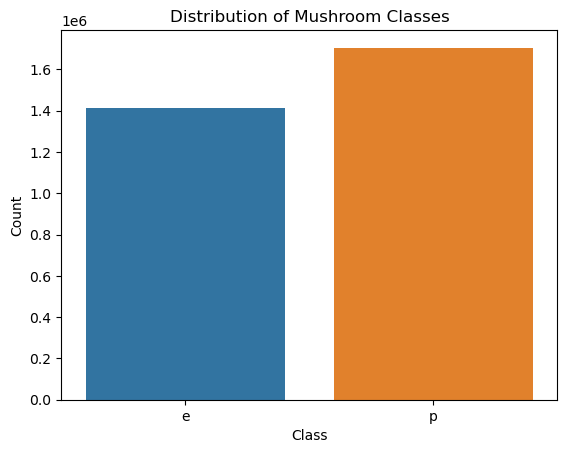

In [60]:
# Class distribution 

sns.countplot(x='class', data=data)
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [4]:
# Class vs Numeical Features 

numerical_cols = ['cap-diameter','stem-height','stem-width']

# for col in numerical_cols:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=data, x=col, hue='class', kde=True, element='step')
#     plt.title(f"Histogram of {col} vs Mushroom Class")
#     plt.show()

In [51]:
# # Box plots 
# for col in numerical_cols:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='class', y=col, data=data)
#     plt.title(f'Box Plot of {col} by Mushroom Class')
#     plt.show()


/Users/rishikesanravichandran/miniconda3/envs/epl_analytics/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


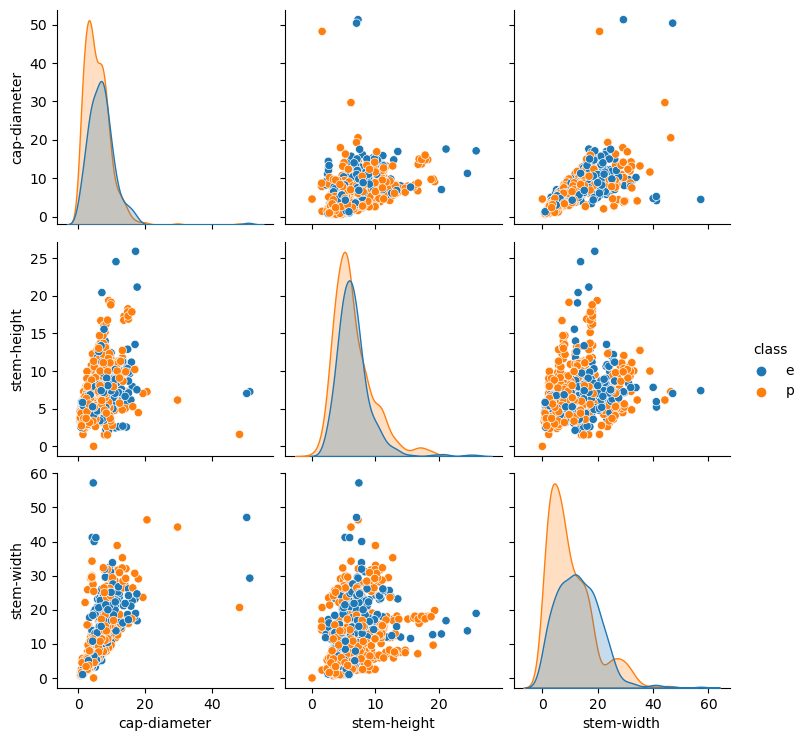

In [35]:
# Pair plots

sns.pairplot(data[numerical_cols+['class']].head(1000), hue='class', diag_kind='kde')
plt.show()


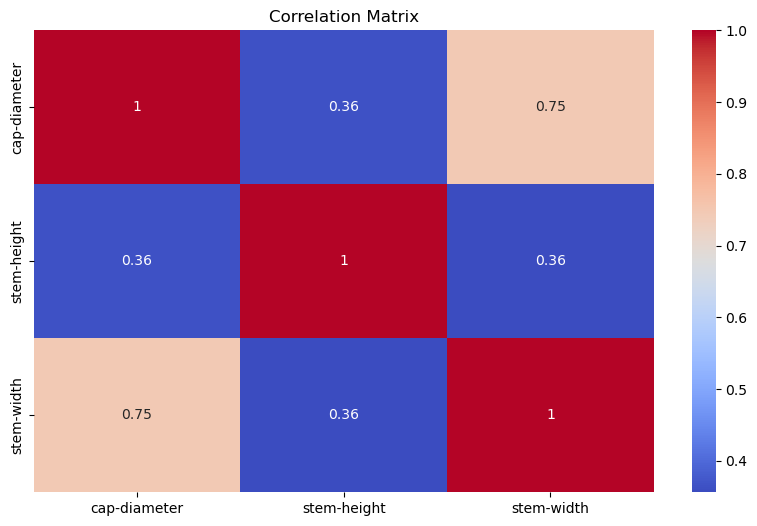

In [49]:
# Correlation Plots

corr = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Pipeline Creation for ease of use 

In [70]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [99]:
# We'll drop the categorical features that has more than 50% of missing values 

cat_df=missing_pct.query("`% Missing` < 50")
categorical_cols_all = data.select_dtypes(include=['object']).columns

categorical_cols = [col for col in categorical_cols_all if col in cat_df.index]

categorical_cols.remove("class")
categorical_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [130]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler(with_mean=False))
])

## Logistic Regression Model

In [132]:
categorical_transformer_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))  # Keep output sparse
])

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer_lr, categorical_cols)
    ])
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('scaler', StandardScaler(with_mean=False)),  # Scale the numerical features
    ('classifier', LogisticRegression(max_iter=1000))
])

X = data[numerical_cols+categorical_cols]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=3, scoring='accuracy')
print(f"{name}: Mean CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)

# Predict probabilities for AUC calculation
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'{name}: Accuracy = {accuracy:.4f}')

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'{name}: ROC AUC = {roc_auc:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'{name}: F1 Score = {f1:.4f}')

# Other metrics
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('-' * 30)

Random Forest: Accuracy = 0.7724
Random Forest: ROC AUC = 0.8557
Random Forest: F1 Score = 0.7902
              precision    recall  f1-score   support

           0       0.74      0.76      0.75    423456
           1       0.80      0.78      0.79    511628

    accuracy                           0.77    935084
   macro avg       0.77      0.77      0.77    935084
weighted avg       0.77      0.77      0.77    935084

Confusion Matrix:
[[321484 101972]
 [110848 400780]]
------------------------------


## Ensemble Trees Modeling

In [136]:

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

categorical_transformer_tree = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Handle unseen labels
])

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer_tree, categorical_cols)
    ])


rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('scaler', StandardScaler(with_mean=False)),  # Scale the numerical features
    ('classifier', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('scaler', StandardScaler(with_mean=False)),  # Scale the numerical features
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [137]:
pipelines = [rf_pipeline, xgb_pipeline]
pipeline_names = ['Random Forest', 'XGBoost']

# # Cross-validate each pipeline
# for name, pipeline in zip(pipeline_names, pipelines):
#     scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')
#     print(f"{name}: Mean CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

for name, pipeline in zip(pipeline_names, pipelines):
    pipeline.fit(X_train_t, y_train_t)
    y_pred = pipeline.predict(X_test_t)
    
    # Predict probabilities for AUC calculation
    y_proba = pipeline.predict_proba(X_test_t)[:, 1]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_t, y_pred)
    print(f'{name}: Accuracy = {accuracy:.4f}')
    
    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_test_t, y_proba)
    print(f'{name}: ROC AUC = {roc_auc:.4f}')
    
    # Calculate F1 score
    f1 = f1_score(y_test_t, y_pred)
    print(f'{name}: F1 Score = {f1:.4f}')
    
    # Other metrics
    print(classification_report(y_test_t, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test_t, y_pred))
    print('-' * 30)
    

Random Forest: Accuracy = 0.9908
Random Forest: ROC AUC = 0.9959
Random Forest: F1 Score = 0.9916
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    423456
           1       0.99      0.99      0.99    511628

    accuracy                           0.99    935084
   macro avg       0.99      0.99      0.99    935084
weighted avg       0.99      0.99      0.99    935084

Confusion Matrix:
[[419509   3947]
 [  4680 506948]]
------------------------------
XGBoost: Accuracy = 0.9891
XGBoost: ROC AUC = 0.9965
XGBoost: F1 Score = 0.9900
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    423456
           1       0.99      0.99      0.99    511628

    accuracy                           0.99    935084
   macro avg       0.99      0.99      0.99    935084
weighted avg       0.99      0.99      0.99    935084

Confusion Matrix:
[[418863   4593]
 [  5609 506019]]
------------------------------


In [141]:
# Fit the best model (Random Forest in this case)
best_pipeline = rf_pipeline
best_pipeline.fit(X, y_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color',
                                                   'does-bruise-or-bleed',
                                                   'gill-attachment',
                                                   'gill-spacing', 'gill-color',
                                                   'stem-color', 'has-ring',
                                                   'ring-type', 'habitat',
                                                   'season'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [145]:
# Load the test data
test_data = pd.read_csv('~/Documents/Kaggle/test.csv')

final_predictions = best_pipeline.predict(test_data[numerical_cols+categorical_cols])

# Convert the predictions back to the original class labels
test_data['class'] = label_encoder.inverse_transform(final_predictions)

# Prepare the final submission
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'class': test_data['class']
})

# Save the submission file
submission_df.to_csv('~/Documents/Kaggle/submission.csv', index=False)


In [146]:
submission_df

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e



## Hyper-Parameter Tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Example for Random Forest
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 10, 20, 30],
#     'classifier__min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

# # Use the best model
# best_rf_pipeline = grid_search.best_estimator_


## Understanding Relationships b/w Features and Mushroom Class

In [ ]:
# Losgistic Regression 